In [106]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook

In [35]:
def init_bandit(k=10):
    pred_values = [0 for x in range(k)]
    act_counts = [0 for x in range(k)]
    return pred_values, act_counts

In [43]:
def random_walk(values=None, k=10):
    if values is None:
        return np.zeros(k)
    else:
        return values + np.random.normal(0, 1e-2, k)

In [46]:
xs = []
values=None
for i in range (100000):
    values = random_walk(values)
    xs.append(values[0])


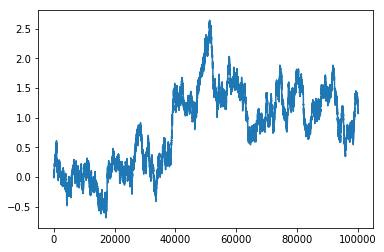

In [47]:
plt.plot(range(len(xs)), xs)

In [88]:
def bandit_step(pred_values,  act_counts, target_values=None, k=10, values=None, epsilon=0, fixed_alpha=0):
    if np.random.rand(1) < epsilon:
        action = np.random.choice(range(10))
    else:
        action = np.argmax(pred_values)
    target_values = random_walk(target_values, k)
    value = target_values[action]
    correct = (value == np.max(target_values))
    act_counts[action] = act_counts[action] + 1
    if fixed_alpha > 0:
        pred_values[action] = pred_values[action] + fixed_alpha*(value - pred_values[action])
    else:
        pred_values[action] = pred_values[action] + 1/act_counts[action]*(value - pred_values[action])
    return pred_values, act_counts, target_values, value, correct
    

In [107]:
iterations = 2000
rewards = np.zeros((iterations, 10000))
corrects = np.zeros((iterations,10000))
for x in tqdm_notebook(range(iterations)):
    pred_values, act_counts = init_bandit()
    target_values=None
    for y in range(10000):
        pred_values, act_counts, target_values, reward, correct = bandit_step(pred_values, act_counts, target_values, epsilon=1e-1)
        rewards[x, y] = reward
        corrects[x, y] = correct
                

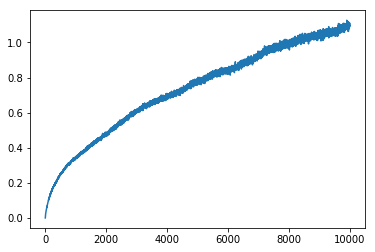

In [108]:
plt.plot(range(len(rewards.mean(0))), rewards.mean(0))

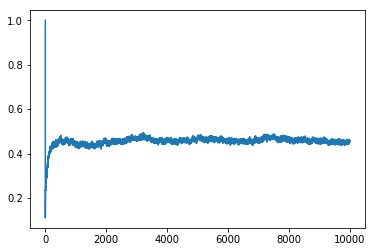

In [109]:
plt.plot(range(len(corrects.mean(0))), corrects.mean(0))

In [115]:
iterations = 2000
rewards = np.zeros((iterations, 10000))
corrects = np.zeros((iterations,10000))
for x in tqdm_notebook(range(iterations)):
    pred_values, act_counts = init_bandit()
    target_values=None
    for y in range(10000):
        pred_values, act_counts, target_values, reward, correct = bandit_step(pred_values, act_counts, target_values, epsilon=1e-1, fixed_alpha=1e-1)
        rewards[x, y] = reward
        corrects[x, y] = correct

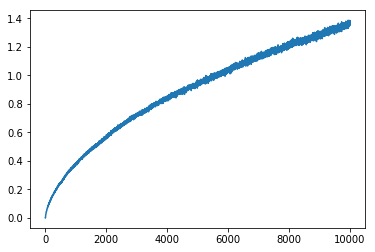

In [116]:
plt.plot(range(len(rewards.mean(0))), rewards.mean(0))

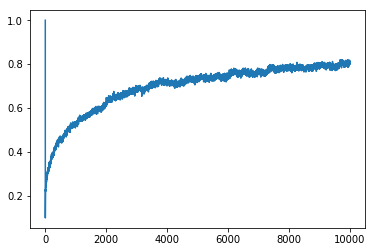

In [117]:
plt.plot(range(len(corrects.mean(0))), corrects.mean(0))